In [2]:
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from umap import UMAP
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

2024-03-17 16:52:47.943055: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
#fitted_pca = pd.read_csv("../../../processed_galaxy_data/processed_galaxy_data/pca_normalized.csv", header = None)
labels_mappings_filtered = pd.read_csv("../../../processed_galaxy_data/processed_galaxy_data/labels_mappings_filtered.csv")
flattened_normalized_images = pd.read_csv("../../../processed_galaxy_data/processed_galaxy_data/flattened_normalized_images.csv", header=None)

In [4]:
print(f"{os.path.getsize('../../../processed_galaxy_data/processed_galaxy_data/labels_mappings_filtered.csv')} bytes")
print(f"{os.path.getsize('../../../processed_galaxy_data/processed_galaxy_data/flattened_normalized_images.csv')} bytes")

6899638 bytes
14973552073 bytes


In [5]:
labels_mappings_filtered

,objid,asset_id,shape_label
0,587722981741363294,3,S
1,587722981741363323,4,S
2,587722981741559888,5,E
3,587722981741625481,6,S
4,587722981741625484,7,S
...,...,...,...
239568,588015510368681992,295294,SB
239569,588015510368682105,295295,E
239570,588015510368682132,295296,E
239571,588015510636265643,295304,S


In [6]:
labels_mappings_filtered['shape_label'].unique()

array(['S', 'E', 'SB', 'A'], dtype=object)

In [7]:
flattened_normalized_images

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0.027451,0.019608,0.015686,0.023529,0.035294,0.035294,0.023529,0.007843,0.019608,0.019608,...,0.039216,0.031373,0.023529,0.019608,0.023529,0.023529,0.019608,0.015686,0.007843,0.007843
1,0.043137,0.027451,0.011765,0.011765,0.019608,0.023529,0.015686,0.003922,0.007843,0.043137,...,0.007843,0.019608,0.035294,0.039216,0.031373,0.015686,0.003922,0.000000,0.015686,0.015686
2,0.137255,0.058824,0.003922,0.011765,0.027451,0.011765,0.007843,0.019608,0.023529,0.031373,...,0.066667,0.062745,0.066667,0.078431,0.070588,0.070588,0.090196,0.121569,0.094118,0.094118
3,0.007843,0.011765,0.015686,0.015686,0.007843,0.003922,0.011765,0.015686,0.015686,0.011765,...,0.003922,0.015686,0.023529,0.023529,0.019608,0.011765,0.011765,0.015686,0.011765,0.011765
4,0.000000,0.011765,0.019608,0.007843,0.003922,0.015686,0.023529,0.015686,0.007843,0.035294,...,0.043137,0.015686,0.027451,0.039216,0.031373,0.058824,0.098039,0.094118,0.109804,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239568,0.035294,0.027451,0.015686,0.007843,0.007843,0.011765,0.019608,0.027451,0.023529,0.023529,...,0.015686,0.019608,0.027451,0.027451,0.019608,0.019608,0.027451,0.031373,0.023529,0.027451
239569,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.031373,0.054902,0.047059,...,0.031373,0.023529,0.019608,0.019608,0.019608,0.019608,0.011765,0.007843,0.019608,0.019608
239570,0.027451,0.047059,0.039216,0.011765,0.023529,0.062745,0.058824,0.019608,0.023529,0.023529,...,0.015686,0.019608,0.019608,0.011765,0.007843,0.007843,0.015686,0.027451,0.031373,0.031373
239571,0.000000,0.000000,0.019608,0.031373,0.019608,0.003922,0.015686,0.043137,0.003922,0.062745,...,0.047059,0.039216,0.023529,0.015686,0.015686,0.023529,0.039216,0.047059,0.023529,0.015686


In [8]:
scaler = StandardScaler()
scaled_flattened_normalized_images = scaler.fit_transform(flattened_normalized_images)

In [9]:
pca = PCA(n_components=35)
sfni_reduced_pca = pca.fit_transform(scaled_flattened_normalized_images)
fni_reduced_pca = pca.fit_transform(flattened_normalized_images)

In [17]:
umap_20_neigh = UMAP(n_neighbors=20,min_dist=0.1,random_state=99,verbose=True)
sfni_reduced_umap = umap_20_neigh.fit_transform(scaled_flattened_normalized_images)

/Users/Art/opt/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(n_neighbors=20, random_state=99, verbose=True)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Sun Mar 17 15:39:49 2024 Construct fuzzy simplicial set
Sun Mar 17 15:39:51 2024 Finding Nearest Neighbors
Sun Mar 17 15:39:52 2024 Building RP forest with 29 trees
Sun Mar 17 15:40:27 2024 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	 3  /  18
	 4  /  18
	 5  /  18
	 6  /  18
	Stopping threshold met -- exiting after 6 iterations
Sun Mar 17 15:40:56 2024 Finished Nearest Neighbor Search
Sun Mar 17 15:41:11 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sun Mar 17 15:44:33 2024 Finished embedding


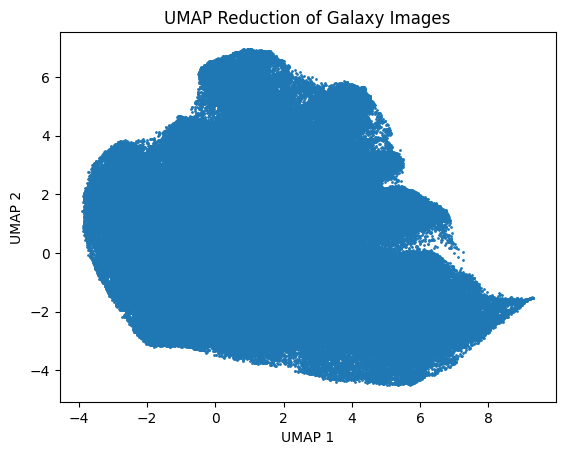

In [19]:
plt.figure()
plt.scatter(sfni_reduced_umap[:,0],sfni_reduced_umap[:,1],s=1)
plt.title('UMAP Reduction of Galaxy Images')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

In [21]:
fni_reduced_umap = umap_20_neigh.fit_transform(flattened_normalized_images)

/Users/Art/opt/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(n_neighbors=20, random_state=99, verbose=True)
Sun Mar 17 15:55:00 2024 Construct fuzzy simplicial set
Sun Mar 17 15:55:03 2024 Finding Nearest Neighbors
Sun Mar 17 15:55:04 2024 Building RP forest with 29 trees
Sun Mar 17 15:55:40 2024 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	 3  /  18
	 4  /  18
	 5  /  18
	Stopping threshold met -- exiting after 5 iterations
Sun Mar 17 15:56:11 2024 Finished Nearest Neighbor Search
Sun Mar 17 15:56:26 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sun Mar 17 15:59:45 2024 Finished embedding


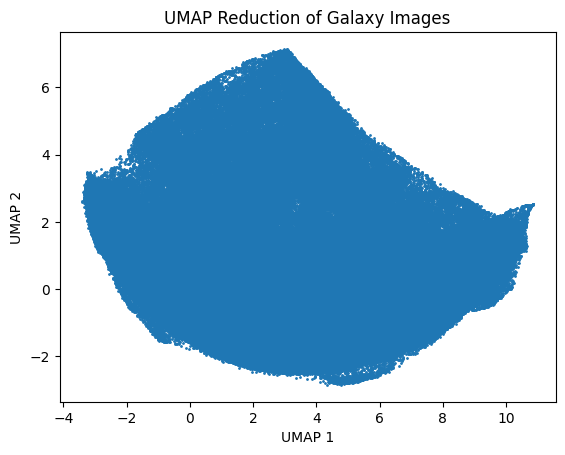

In [22]:
plt.figure()
plt.scatter(fni_reduced_umap[:,0],fni_reduced_umap[:,1],s=1)
plt.title('UMAP Reduction of Galaxy Images')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

In [10]:
dbscan = DBSCAN(eps=0.5,min_samples=5)

In [11]:
clusters_sfni_dbscan = dbscan.fit_predict(sfni_reduced_pca)

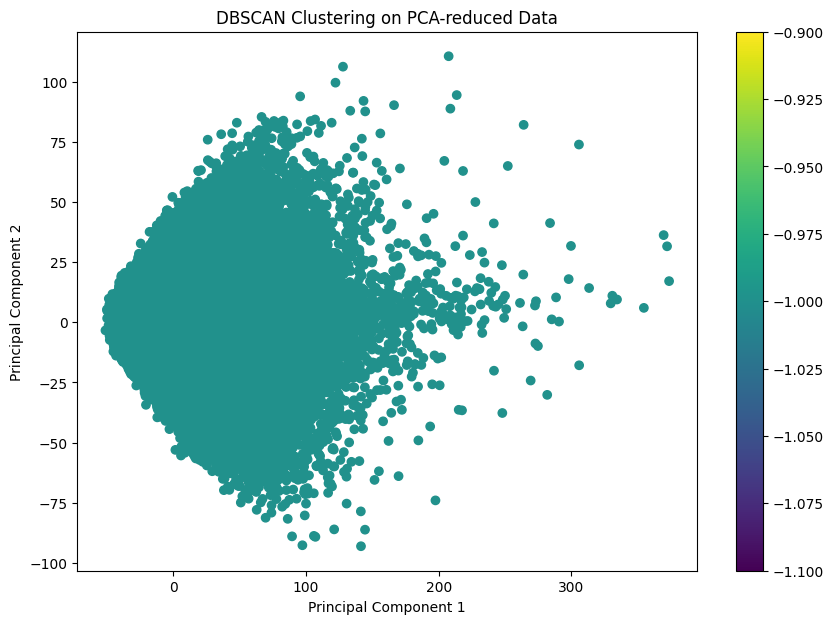

In [16]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(sfni_reduced_pca[:, 0], sfni_reduced_pca[:, 1], c=clusters_sfni_dbscan, cmap='viridis')

plt.colorbar(scatter)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering on PCA-reduced Data')

plt.show()

In [17]:
clusters_fni_dbscan = dbscan.fit_predict(fni_reduced_pca)

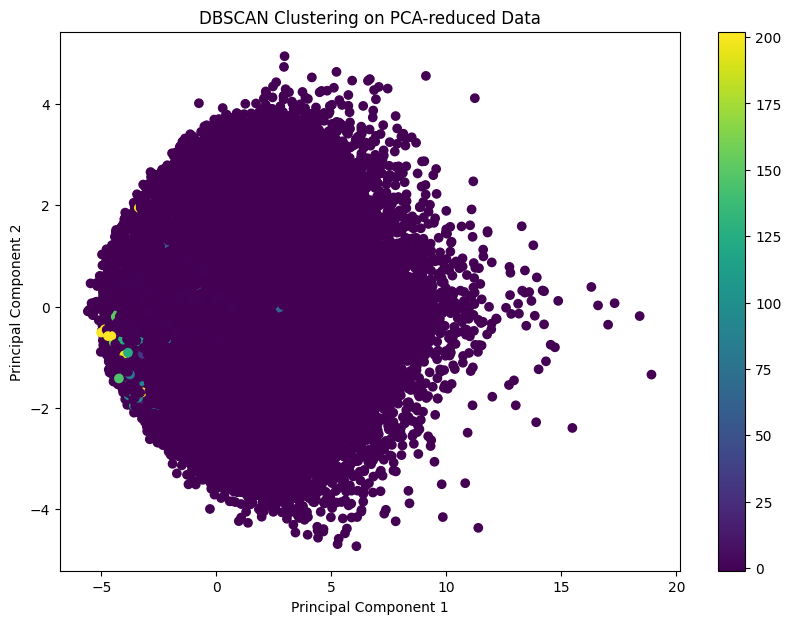

In [18]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(fni_reduced_pca[:, 0], fni_reduced_pca[:, 1], c=clusters_fni_dbscan, cmap='viridis')

plt.colorbar(scatter)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering on PCA-reduced Data')

plt.show()

In [19]:
# To exclude noise points for silhouette score calculation
mask = clusters_fni_dbscan != -1
scores = silhouette_score(fni_reduced_pca[mask], clusters_fni_dbscan[mask])

print(f'Silhouette Score (excluding noise): {scores}')

Silhouette Score (excluding noise): -0.44068364940310056


In [21]:
# Adding DBSCAN cluster assignments to df
labels_mappings_filtered['cluster_fni_dbscan_esp05ms5'] = clusters_fni_dbscan

# Analyzing cluster composition
cluster_composition = labels_mappings_filtered[labels_mappings_filtered['cluster_fni_dbscan_esp05ms5'] != -1].groupby('cluster_fni_dbscan_esp05ms5')['shape_label'].value_counts().unstack(fill_value=0)
print(cluster_composition)

shape_label                   A     E     S    SB
cluster_fni_dbscan_esp05ms5                      
0                            42  9608  9285  4447
1                             0     3     3     2
2                             0     2     4     1
3                             0    10    12     5
4                             0     4     2     1
...                          ..   ...   ...   ...
198                           0     4     1     1
199                           0     4     0     1
200                           0     1     2     1
201                           0     2     2     1
202                           0     2     2     1

[203 rows x 4 columns]


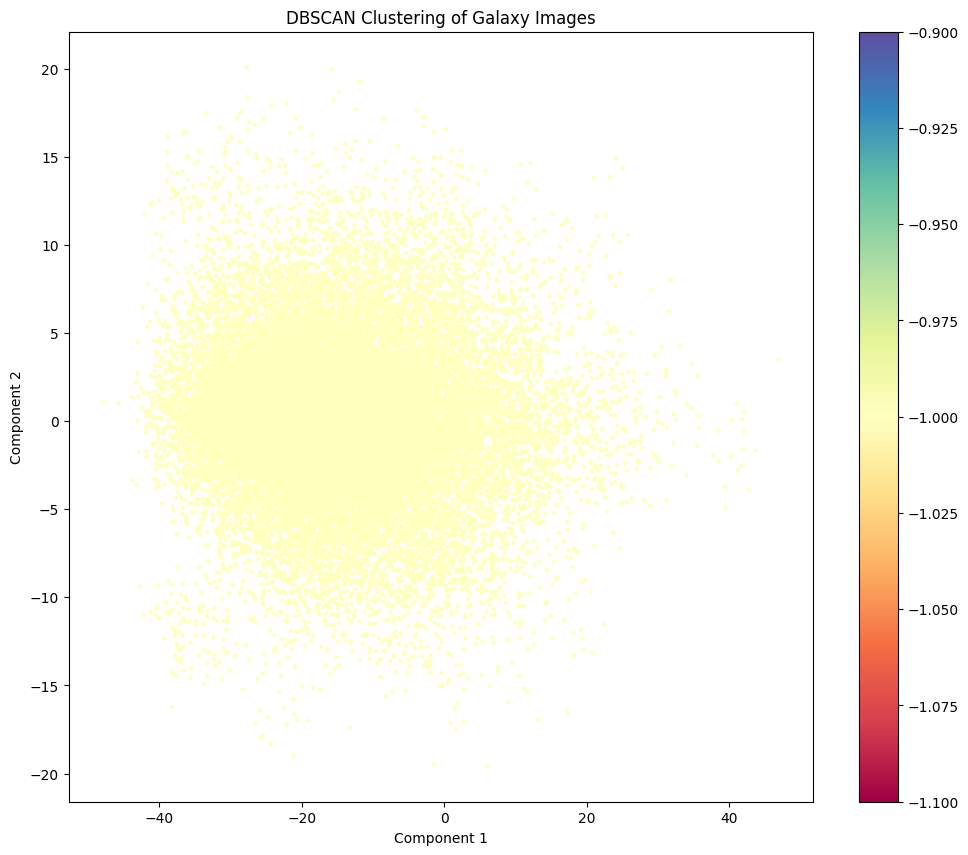

In [22]:
# Plotting the clusters (excluding noise points)
plt.figure(figsize=(12, 10))
scatter = plt.scatter(sfni_reduced_pca[mask, 0], sfni_reduced_pca[mask, 1], c=clusters_sfni_dbscan[mask], cmap='Spectral', s=5)
plt.title('DBSCAN Clustering of Galaxy Images')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter)
plt.show()